In [0]:
%pip install econml

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate customer IDs
customer_ids = np.arange(1, 1001)

# Generate random ages between 18 and 70
ages = np.random.randint(18, 70, size=1000)

# Generate random income between 20k and 120k
incomes = np.random.randint(20000, 120000, size=1000)

# Randomly assign customers to payer types
payer_types = np.random.choice(['non_payer', 'normal_payer', 'super_payer'], size=1000)

# Ensure at least 100 users in each treatment group
treatment = np.array([0]*500 + [1]*500)
np.random.shuffle(treatment)

# Generate revenue based on payer type, treatment, and age
revenue = np.zeros(1000)

# For non_payers
revenue[(payer_types == 'non_payer') & (treatment == 0)] = np.random.normal(5, 2, size=np.sum((payer_types == 'non_payer') & (treatment == 0)))
revenue[(payer_types == 'non_payer') & (treatment == 1) & (ages < 40)] = np.random.normal(10, 2, size=np.sum((payer_types == 'non_payer') & (treatment == 1) & (ages < 40)))
revenue[(payer_types == 'non_payer') & (treatment == 1) & (ages >= 40)] = np.random.normal(3, 2, size=np.sum((payer_types == 'non_payer') & (treatment == 1) & (ages >= 40)))

# For normal_payers
revenue[(payer_types == 'normal_payer') & (treatment == 0)] = np.random.normal(50, 10, size=np.sum((payer_types == 'normal_payer') & (treatment == 0)))
revenue[(payer_types == 'normal_payer') & (treatment == 1) & (ages < 40)] = np.random.normal(80, 15, size=np.sum((payer_types == 'normal_payer') & (treatment == 1) & (ages < 40)))
revenue[(payer_types == 'normal_payer') & (treatment == 1) & (ages >= 40)] = np.random.normal(40, 10, size=np.sum((payer_types == 'normal_payer') & (treatment == 1) & (ages >= 40)))

# For super_payers
revenue[(payer_types == 'super_payer') & (treatment == 0)] = np.random.normal(200, 50, size=np.sum((payer_types == 'super_payer') & (treatment == 0)))
revenue[(payer_types == 'super_payer') & (treatment == 1) & (ages < 40)] = np.random.normal(350, 60, size=np.sum((payer_types == 'super_payer') & (treatment == 1) & (ages < 40)))
revenue[(payer_types == 'super_payer') & (treatment == 1) & (ages >= 40)] = np.random.normal(150, 40, size=np.sum((payer_types == 'super_payer') & (treatment == 1) & (ages >= 40)))

# Create a DataFrame
df = pd.DataFrame({
    'customer_id': customer_ids,
    'age': ages,
    'income': incomes,
    'payer_type': payer_types,
    'treatment': treatment,
    'revenue': revenue
})

print(df.head())


   customer_id  age  income    payer_type  treatment     revenue
0            1   56   54674  normal_payer          0   63.466658
1            2   69   55854   super_payer          1  151.198618
2            3   46   66271     non_payer          1    4.588280
3            4   32   93688   super_payer          1  311.056777
4            5   60   58518     non_payer          0    5.459744


In [0]:
df.treatment.value_counts()

0    500
1    500
Name: treatment, dtype: int64

In [0]:
df.payer_type.value_counts()

normal_payer    347
non_payer       339
super_payer     314
Name: payer_type, dtype: int64

In [0]:
df.groupby('treatment')['revenue'].mean() #Let's assume the revenue here is the revenue post experiment ramp

treatment
0    83.758115
1    93.372405
Name: revenue, dtype: float64

In [0]:
df.groupby(['treatment','payer_type'])['revenue'].mean()

treatment  payer_type  
0          non_payer         5.163501
           normal_payer     49.353025
           super_payer     203.820302
1          non_payer         5.660638
           normal_payer     57.489481
           super_payer     230.869586
Name: revenue, dtype: float64

In [0]:
display(df)

customer_id,age,income,payer_type,treatment,revenue
1,56,54674,normal_payer,0,63.466658228367876
2,69,55854,super_payer,1,151.19861760389006
3,46,66271,non_payer,1,4.588280120152358
4,32,93688,super_payer,1,311.05677677429765
5,60,58518,non_payer,0,5.459744416247876
6,25,30267,super_payer,1,329.2007983141934
7,38,110825,super_payer,1,416.41101093138934
8,56,21062,normal_payer,0,52.63851701073935
9,36,70448,non_payer,1,13.338457509280603
10,40,115462,normal_payer,1,43.72832991798632


In [0]:
df_simplify = df.copy()

In [0]:
df_dummies = pd.get_dummies(df_simplify[['payer_type']], drop_first=False)
df_simplify_with_dummies = pd.concat([df_simplify[['treatment','age','income']], df_dummies], axis=1)
df_simplify_with_dummies.dropna(inplace= True)
df_simplify_with_dummies.head()

,treatment,age,income,revenue,payer_type_non_payer,payer_type_normal_payer,payer_type_super_payer
0,0,56,54674,63.466658,0,1,0
1,1,69,55854,151.198618,0,0,1
2,1,46,66271,4.588280,1,0,0
3,1,32,93688,311.056777,0,0,1
4,0,60,58518,5.459744,1,0,0


In [0]:
X = ['age',	'income','payer_type_non_payer','payer_type_normal_payer','payer_type_super_payer'] #remove treatment binary and revenue (effect)

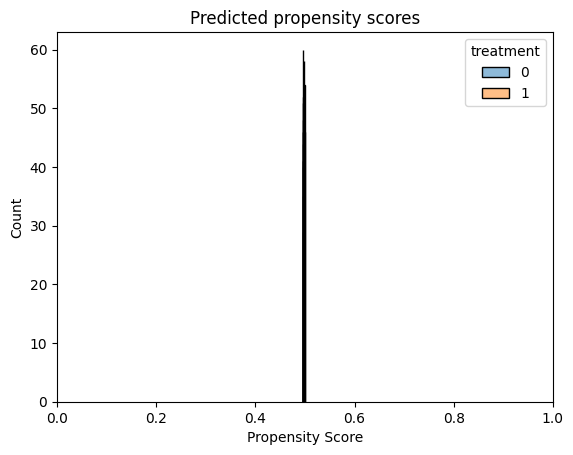

In [0]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
df_simplify_with_dummies['pscore'] = LogisticRegression().fit(df_simplify_with_dummies[X], df_simplify_with_dummies['treatment']).predict_proba(df_simplify_with_dummies[X])[:,1]
sns.histplot(data=df_simplify_with_dummies, x='pscore', hue='treatment').set(
    title='Predicted propensity scores', xlim=[0,1], xlabel='Propensity Score');

In [0]:
df_model = df_simplify_with_dummies.copy()
df_model['y_star'] = df_model['revenue'] / (df_model['treatment'] * df_model['pscore'] - (1-df_model['treatment']) * (1-df_model['pscore']))

In [0]:
df_model['y_star'].mean() #estimated treatment effect

10.583392681611764

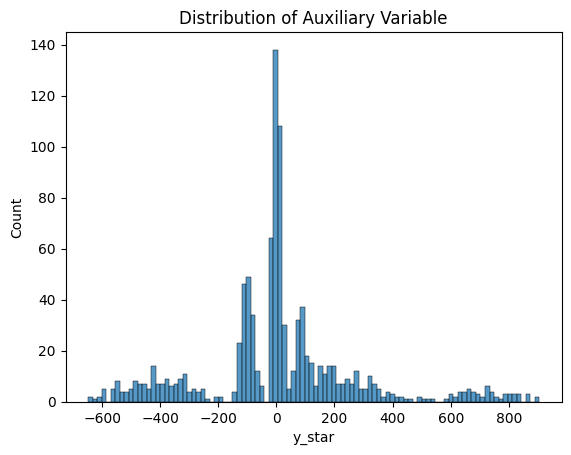

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(df_model['y_star'], ax=ax, bins=100).set(title='Distribution of Auxiliary Variable');

Ready to estimate heterogeneous treatment effects, by translating the causal inference problem into a prediction problem, predicting the auxiliary outcome, given observable characteristics

In [0]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=2).fit(df_model[X], df_model['y_star'])
df_model['y_hat'] = tree.predict(df_model[X])

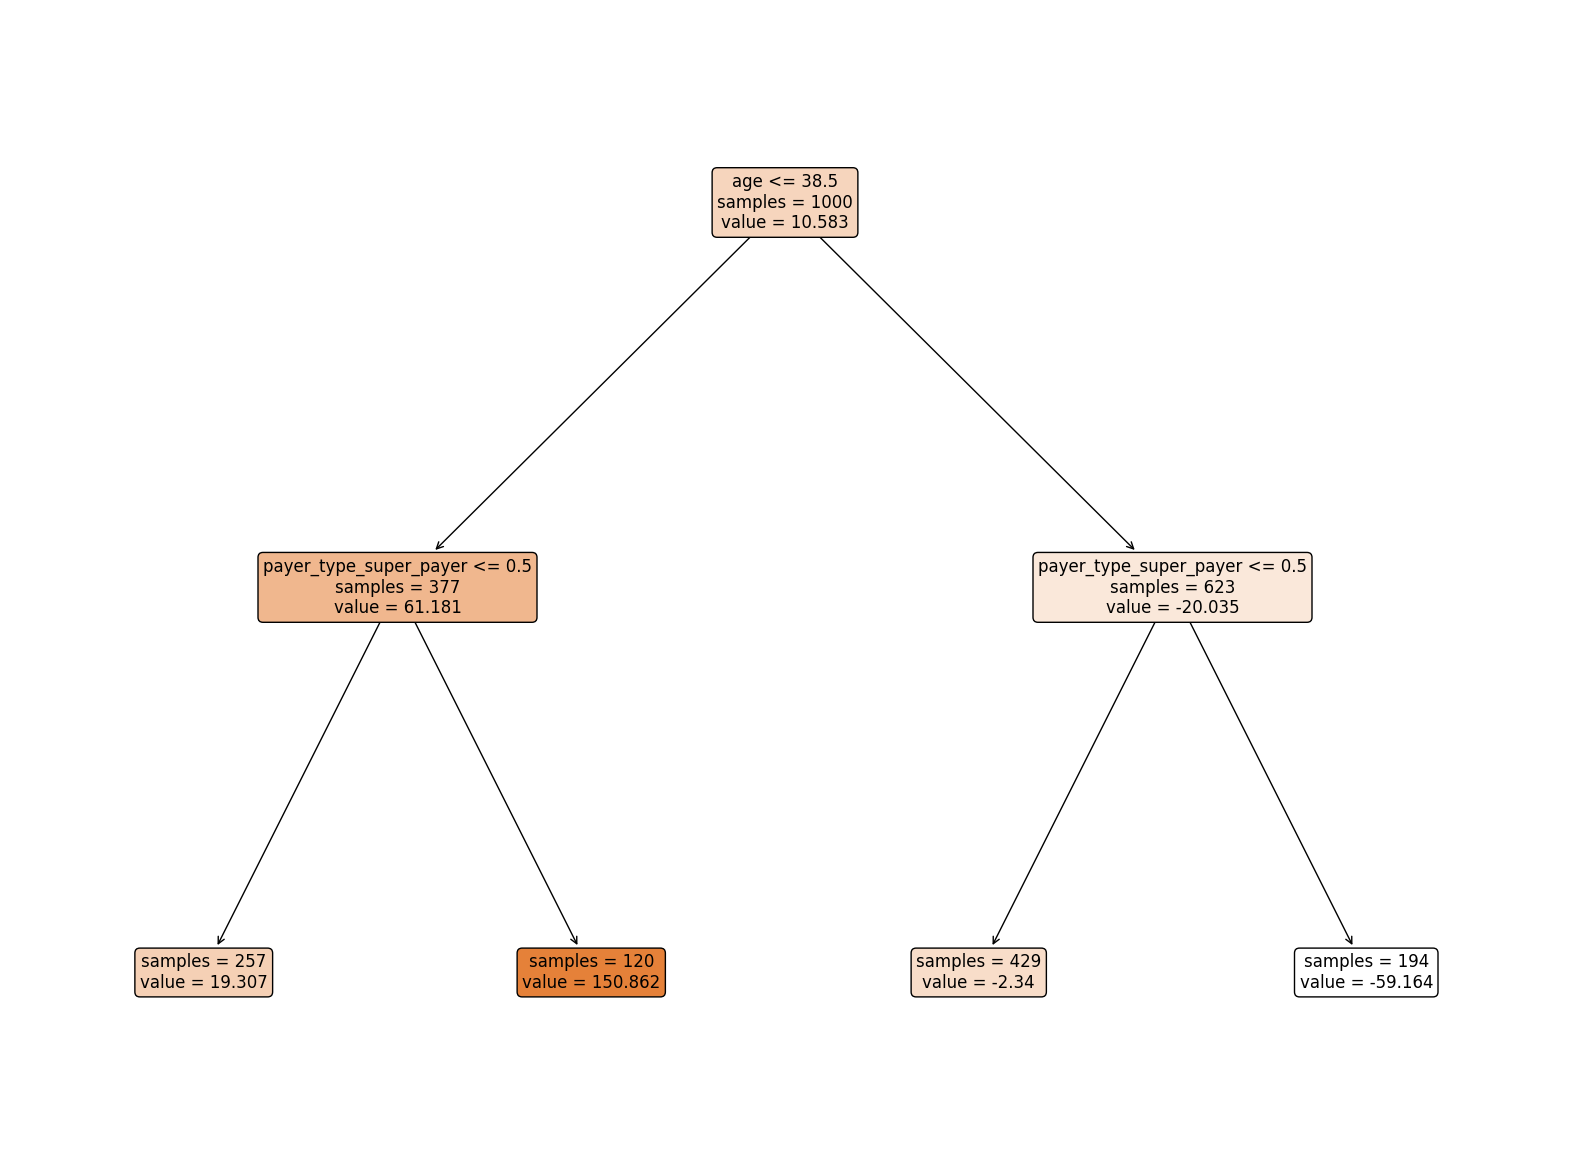

In [0]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(20, 15))
plot_tree(tree, filled=True, fontsize=12, feature_names=X, impurity=False, rounded=True);
plt.show();
#value here is the mean of conditional average treatment effect (if it's under the condition of age < 38.5 ..., what's the treatment effect)
#positive CATE means under the condition branch, the group will react positively
#the magnitude indicates how big of differece or how big of the CATE. E.g. super payer has higher CATE because the increment for them is larger 200 -> 230 when given treatment

In [0]:
from econml.dml import CausalForestDML
from sklearn.linear_model import MultiTaskLassoCV, LassoCV, LogisticRegressionCV
tree_model = CausalForestDML(n_estimators=40, subforest_size=4, inference=True, max_depth=None, mc_iters = 1000, model_y=LassoCV(alphas = [.8, .9], max_iter=10000), model_t=LassoCV(alphas = [.8, .9], max_iter=10000))
tree_model = tree_model.fit(df_model['revenue'], T = df_model['treatment'], X= df_model[X], W= None, cache_values=True)

Model LassoCV(alphas=[0.8, 0.9],
        cv=[(array([  3,   6,   7,  11,  15,  18,  19,  21,  24,  25,  28,  29,  30,
        32,  35,  38,  41,  42,  43,  45,  49,  51,  52,  53,  57,  59,
        65,  70,  71,  72,  74,  76,  77,  78,  82,  84,  85,  86,  87,
        89,  92,  95,  97, 100, 101, 103, 106, 107, 108, 109, 110, 111,
       115, 116, 117, 122, 124, 127, 128, 129, 130, 133, 134, 136, 137,
       141, 143, 146, 147, 149, 154, 155, 158, 159, 160, 161, 162, 163,
       168, 170, 171, 177, 178, 180, 181, 184, 185, 186, 187, 188...
       816, 817, 818, 821, 824, 825, 827, 830, 833, 835, 837, 841, 843,
       844, 849, 852, 854, 857, 858, 860, 863, 865, 868, 872, 878, 880,
       882, 883, 886, 887, 892, 897, 898, 899, 900, 901, 905, 906, 907,
       909, 911, 912, 913, 914, 915, 916, 919, 924, 926, 927, 928, 929,
       930, 931, 932, 933, 934, 937, 939, 940, 941, 945, 947, 951, 952,
       953, 955, 956, 958, 959, 963, 966, 967, 970, 972, 976, 977, 980,
       981, 982, 990,

In [0]:
tree_model.summary()

Population summary of CATE predictions on Training Data
Doubly Robust ATE on Training Data Results:  Doubly Robust ATE calculation on training data is available only on discrete treatments!
Doubly Robust ATT on Training Data Results:  Doubly Robust ATT calculation on training data is available only on discrete treatments!


<class 'econml.utilities.Summary'>
"""
               Uncertainty of Mean Point Estimate              
===============================================================
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
    12.386       9.628 1.286  0.198        -6.485        31.256
      Distribution of Point Estimate     
=========================================
std_point pct_point_lower pct_point_upper
-----------------------------------------
   54.549         -55.167         149.708
     Total Variance of Point Estimate     
==========================================
stderr_point ci_point_lower ci_point_upper
------------------------------------------
      55.392        -64.806        154.673
------------------------------------------

Note: The stderr_mean is a conservative upper bound.
"""

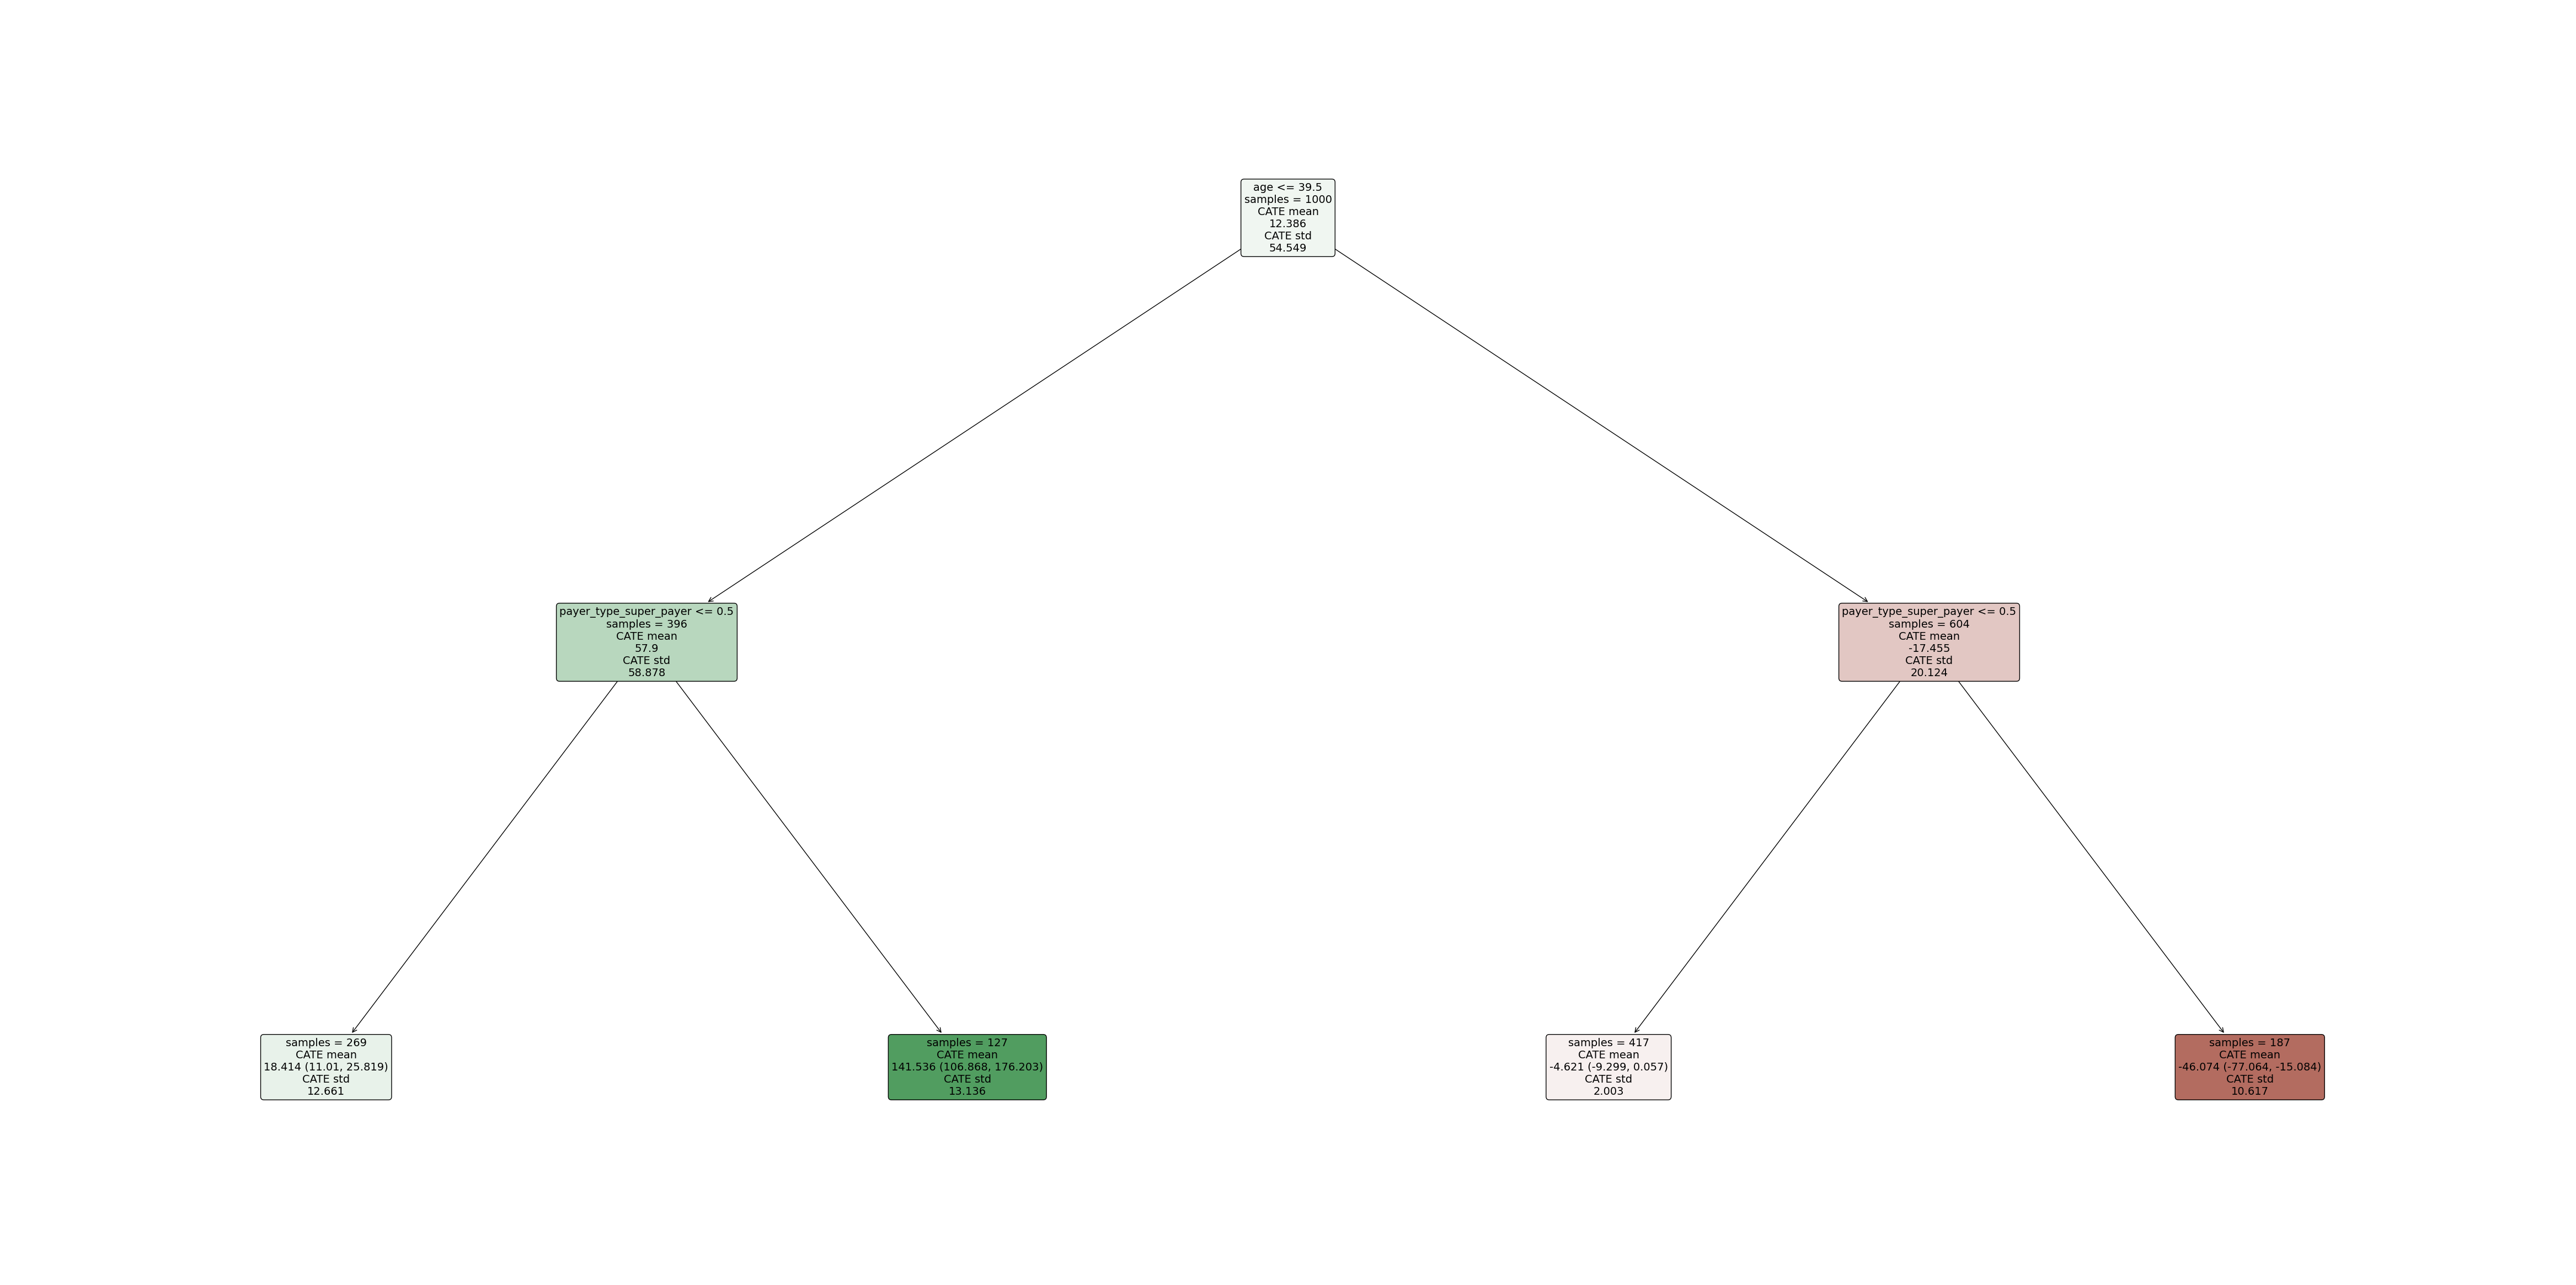

In [0]:
from econml.cate_interpreter import SingleTreeCateInterpreter
from econml.dml import LinearDML
#est = LinearDML()
#est.fit(y, t, X=X, W=W)

fig = plt.figure(figsize=(60, 30))

intrp = SingleTreeCateInterpreter(include_model_uncertainty=True, max_depth=2, min_samples_leaf=2)
# We interpret the CATE model's behavior based on the features used for heterogeneity
intrp.interpret(tree_model, df_model[X])
# Plot the tree
intrp.plot(feature_names=X, fontsize=14)

plt.show();